<h1 style="font-size:2em; text-align: center;">Cleaning the Data</h1>

In [29]:
import pandas as pd

In [30]:
# This gets data for county off of gender, ethnicity and removing nation and state levels

master_df = pd.read_csv("Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County.csv", sep=",")

# removes the insufficient data columns
rem_null_overall_df = master_df[master_df['Data_Value_Footnote'].isnull()]

# gets only male/female
only_gen_overall_df = rem_null_overall_df[rem_null_overall_df['Stratification1'] != 'Overall']

# removes the overall for the ethnicity
only_eth_overall_df = only_gen_overall_df[only_gen_overall_df['Stratification2'] != 'Overall']

# only gets the county
only_county_overall_df = only_eth_overall_df[only_eth_overall_df['GeographicLevel'] == 'County']

# get the columns we are only using
desired_columns = ['LocationAbbr', 'LocationDesc', 'Data_Value', 'Stratification1', 'Stratification2']
cleaned_county_df = only_county_overall_df[desired_columns]

# Renamed the columns to better naming for the project
cleaned_county_df.columns = ['State', 'County', 'Heart Disease per 100k', 'Gender', 'Ethnicity']

# Validated the column total (I checked against the excel and made sure this was correct)
# print(len(cleaned_county_df))

# Checking the data
cleaned_county_df.head()



,State,County,Heart Disease per 100k,Gender,Ethnicity
102,AK,Anchorage,317.5,Male,White
105,AK,Denali,400.7,Male,White
106,AK,Fairbanks North Star,401.0,Male,White
107,AK,Haines,385.5,Male,White
108,AK,Juneau,281.6,Male,White


In [31]:
# This block is to get the clean county overall data only 

rem_null_overall_df = master_df[master_df['Data_Value_Footnote'].isnull()]

# gets overall for gender
only_gen_overall_df = rem_null_overall_df[rem_null_overall_df['Stratification1'] == 'Overall']

# gets overall for ethnicity
only_eth_overall_df = only_gen_overall_df[only_gen_overall_df['Stratification2'] == 'Overall']

# only gets the county
only_county_overall_df = only_eth_overall_df[only_eth_overall_df['GeographicLevel'] == 'County']

# get the columns we are only using
cleaned_county_overall_df = only_county_overall_df[desired_columns]

# Renamed the columns to better naming for the project
cleaned_county_overall_df.columns = ['State', 'County', 'Heart Disease per 100k', 'Gender', 'Ethnicity']

# Validated the column total (Verified the excel and it's correct) 
# print(len(cleaned_county_overall_df))

cleaned_county_overall_df.head()


,State,County,Heart Disease per 100k,Gender,Ethnicity
0,AK,Aleutians East,105.3,Overall,Overall
1,AK,Aleutians West,211.9,Overall,Overall
2,AK,Anchorage,257.9,Overall,Overall
3,AK,Bethel,351.6,Overall,Overall
5,AK,Denali,305.5,Overall,Overall


In [32]:
# This function finds the outliers using the interquartile range method
def find_outliers_iqr(df, column):
    # Extract the data column
    data = df[column]

    # Calculate the quartiles
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower bound and upper bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers based on the bounds
    outliers = (data < lower_bound) | (data > upper_bound)

    # Remove outliers from the DataFrame
    df = df[~outliers]

    return df

# Clean outliers from cleaned_county_df DataFrame
cleaned_county_df = find_outliers_iqr(cleaned_county_df, 'Heart Disease per 100k')

# Clean outliers from cleaned_county_overall_df DataFrame
cleaned_county_overall_df = find_outliers_iqr(cleaned_county_overall_df, 'Heart Disease per 100k')




<h1 style="font-size:2em; text-align: center;">Exploratory Data Analysis</h1>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats

In [34]:
# Print 5 Number Summary for cleaned data with no outliers
print("5 Number Summary for cleaned data with no outliers\n", cleaned_county_df.describe())

# Print 5 Number Summary for cleaned data overall with no outliers
print("\n5 Number Summary for cleaned data overall with no outliers\n", cleaned_county_overall_df.describe())

# Calculate statistics for overall cleaned data
overall_mean = np.mean(cleaned_county_overall_df['Heart Disease per 100k'])
overall_std = np.std(cleaned_county_overall_df['Heart Disease per 100k'], ddof=1)
overall_size = len(cleaned_county_overall_df)

# Calculate statistics for individual cleaned data
indv_mean = np.mean(cleaned_county_df['Heart Disease per 100k'])
indv_size = len(cleaned_county_df)

# Calculate standard error for the sample
se_indv = overall_std / np.sqrt(indv_size)

# Print calculated statistics
print("Population Mean:", overall_mean)
print("Sample Mean:", indv_mean)
print("Standard Error for the Sample:", se_indv)

5 Number Summary for cleaned data with no outliers
        Heart Disease per 100k
count            13484.000000
mean               347.002648
std                143.989750
min                  6.000000
25%                239.675000
50%                335.900000
75%                445.800000
max                763.500000

5 Number Summary for cleaned data overall with no outliers
        Heart Disease per 100k
count             3162.000000
mean               353.284756
std                 79.606042
min                133.500000
25%                294.025000
50%                345.850000
75%                404.575000
max                580.400000
Population Mean: 353.2847564832387
Sample Mean: 347.0026475823194
Standard Error for the Sample: 0.6855460914644189


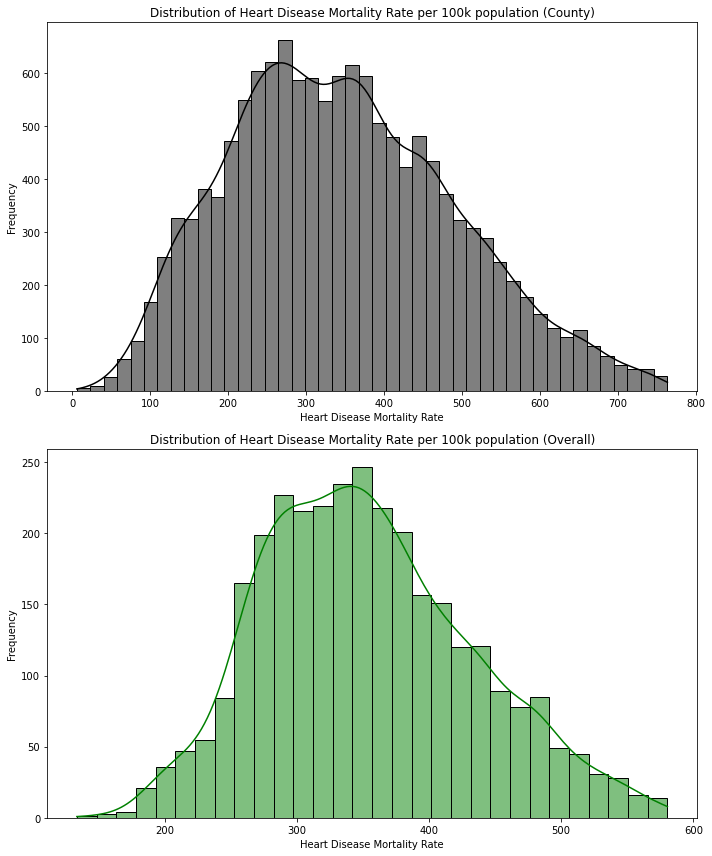

In [35]:
# Create a figure and axes with a 2x1 layout
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Subplot 1: Histogram for cleaned_county_df
sns.histplot(cleaned_county_df['Heart Disease per 100k'], bins='auto', kde=True, color='black', ax=axes[0])
axes[0].set_title('Distribution of Heart Disease Mortality Rate per 100k population (County)')
axes[0].set_xlabel('Heart Disease Mortality Rate')
axes[0].set_ylabel('Frequency')

# Subplot 2: Histogram for cleaned_county_overall_df
sns.histplot(cleaned_county_overall_df['Heart Disease per 100k'], bins='auto', kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution of Heart Disease Mortality Rate per 100k population (Overall)')
axes[1].set_xlabel('Heart Disease Mortality Rate')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


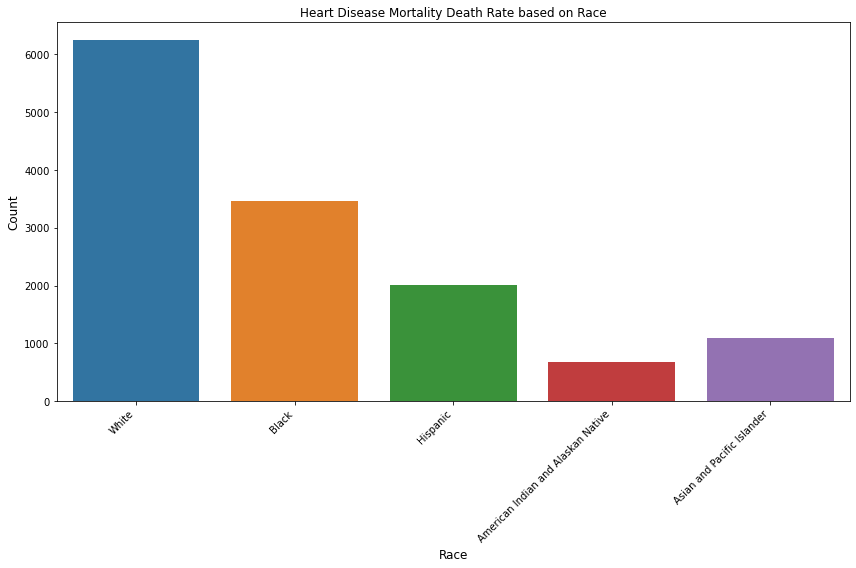

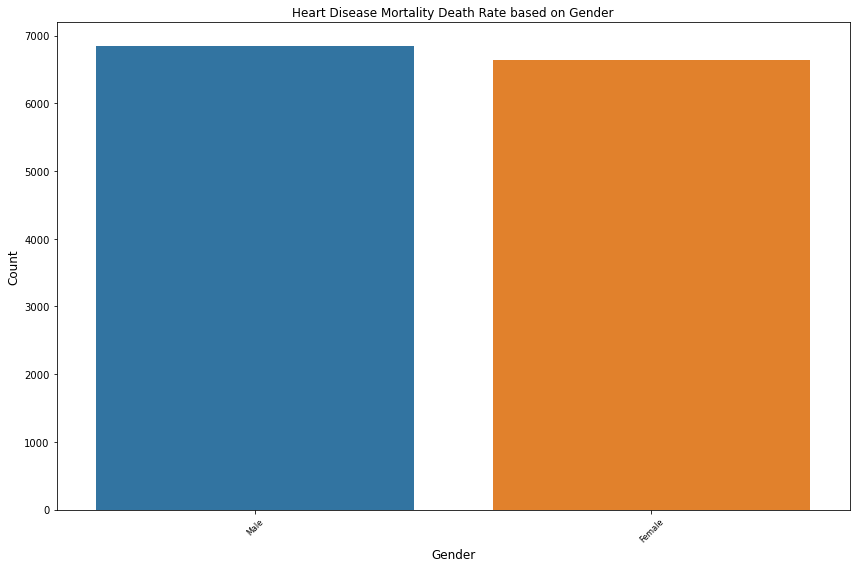

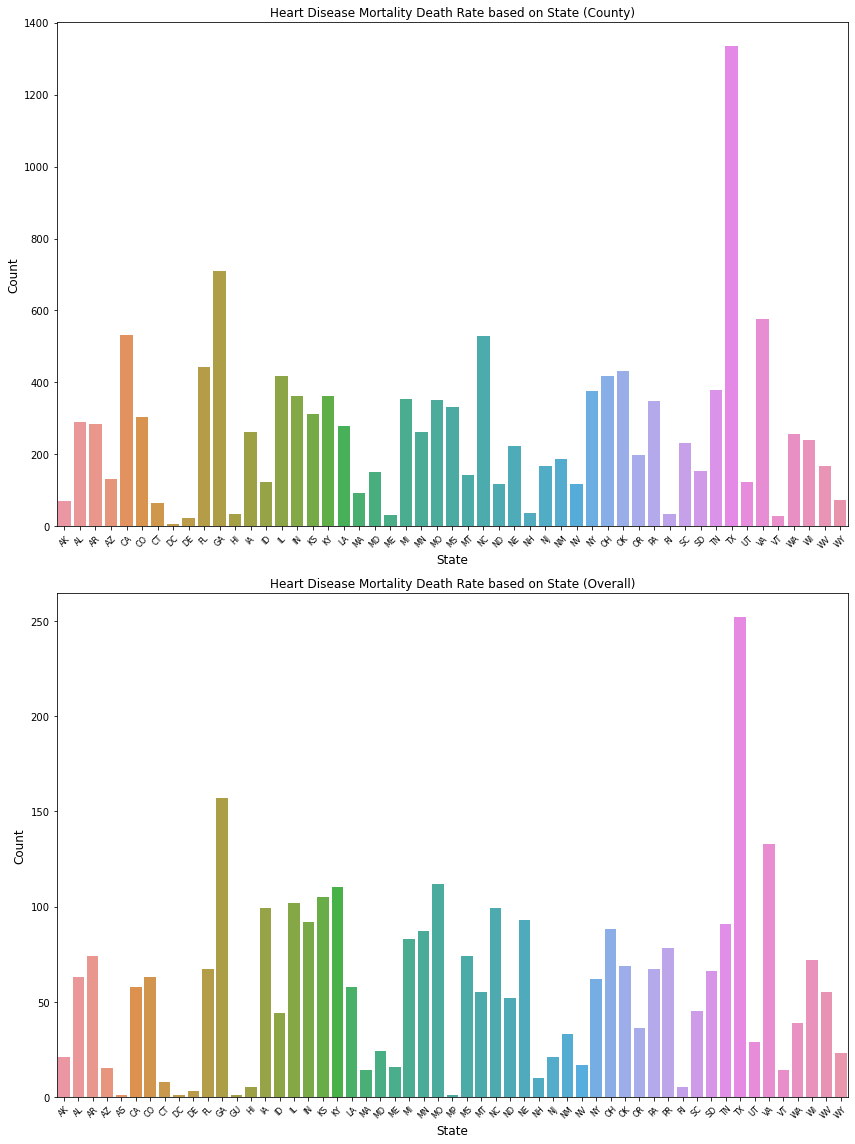

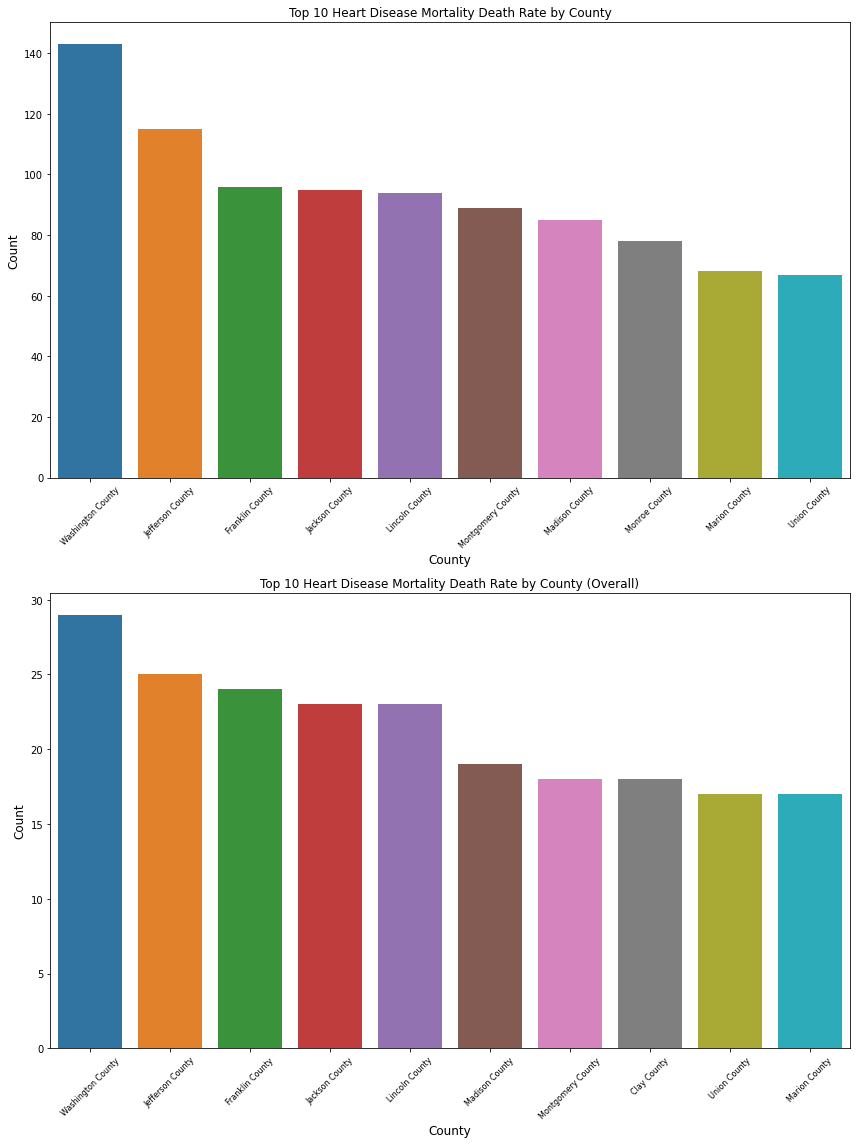

In [36]:

# Plot for Ethnicity
plt.figure(figsize=(12, 8))  # Countplot for Ethnicity
sns.countplot(data=cleaned_county_df, x='Ethnicity')
plt.title('Heart Disease Mortality Death Rate based on Race', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels by 45 degrees and align them to the right
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Plot for Gender
plt.figure(figsize=(12, 8))  # Countplot for Gender
sns.countplot(data=cleaned_county_df, x='Gender')
plt.title('Heart Disease Mortality Death Rate based on Gender', fontsize=12)
plt.xticks(rotation=45, fontsize=8)  # Decrease font size
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Plot for States
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))  # Create a figure and axes with a 2x1 layout

# Subplot 1: Countplot for State in cleaned_county_df
sns.countplot(data=cleaned_county_df, x='State', ax=axs[0])
axs[0].set_title('Heart Disease Mortality Death Rate based on State (County)', fontsize=12)
axs[0].tick_params(axis='x', labelrotation=45, labelsize=8)  # Rotate and decrease x-axis tick label size
axs[0].set_xlabel('State', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)

# Subplot 2: Countplot for State in cleaned_county_overall_df
sns.countplot(data=cleaned_county_overall_df, x='State', ax=axs[1])
axs[1].set_title('Heart Disease Mortality Death Rate based on State (Overall)', fontsize=12)
axs[1].tick_params(axis='x', labelrotation=45, labelsize=8)  # Rotate and decrease x-axis tick label size
axs[1].set_xlabel('State', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Plot for top 10 counties
top_counties = cleaned_county_df['County'].value_counts().nlargest(10).index  # Calculate the top 10 counties
top_counties_overall = cleaned_county_overall_df['County'].value_counts().nlargest(10).index

top_county_data = cleaned_county_df[cleaned_county_df['County'].isin(top_counties)]  # Filter the dataset to include only the top 10 counties
top_county_data_overall = cleaned_county_overall_df[cleaned_county_overall_df['County'].isin(top_counties_overall)]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))  # Create a figure and axes with a 2x1 layout

# Subplot 1: Countplot for top 10 counties' heart disease mortality death rates
sns.countplot(data=top_county_data, x='County', order=top_counties, ax=axs[0])
axs[0].set_title('Top 10 Heart Disease Mortality Death Rate by County', fontsize=12)
axs[0].tick_params(axis='x', labelrotation=45, labelsize=8)  # Rotate and decrease x-axis tick label size
axs[0].set_xlabel('County', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)

# Subplot 2: Countplot for top 10 counties' heart disease mortality death rates (overall)
sns.countplot(data=top_county_data_overall, x='County', order=top_counties_overall, ax=axs[1])
axs[1].set_title('Top 10 Heart Disease Mortality Death Rate by County (Overall)', fontsize=12)
axs[1].tick_params(axis='x', labelrotation=45, labelsize=8)  # Rotate and decrease x-axis tick label size
axs[1].set_xlabel('County', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

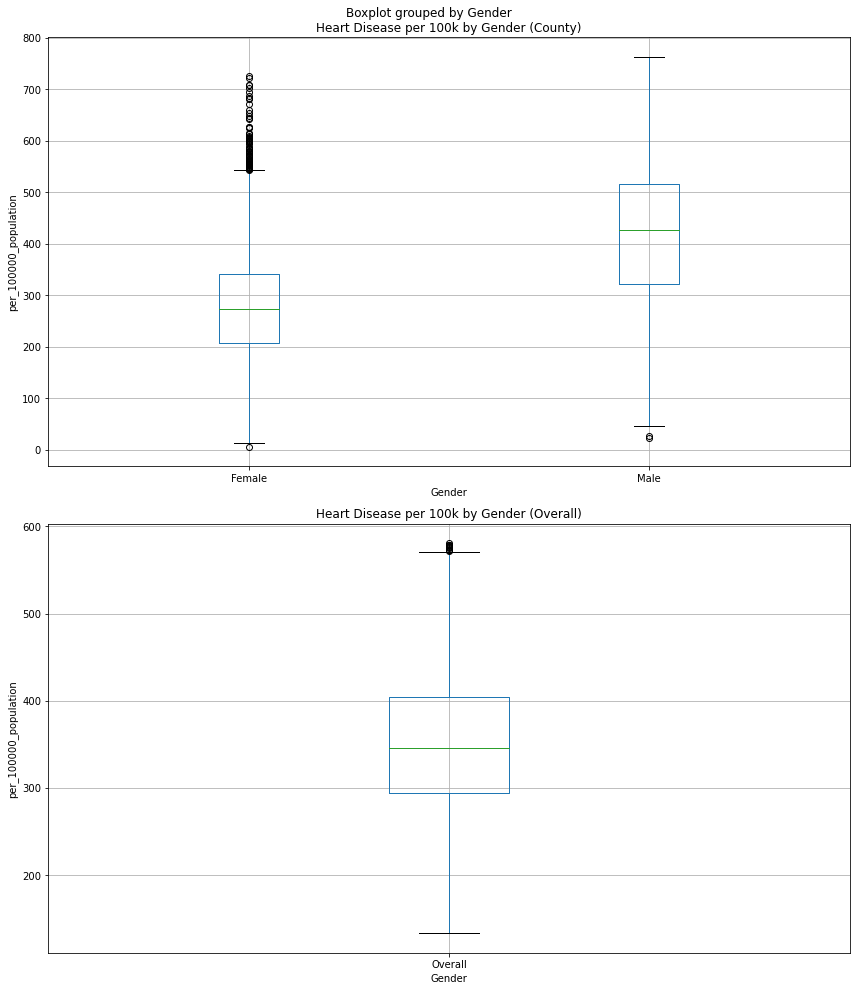

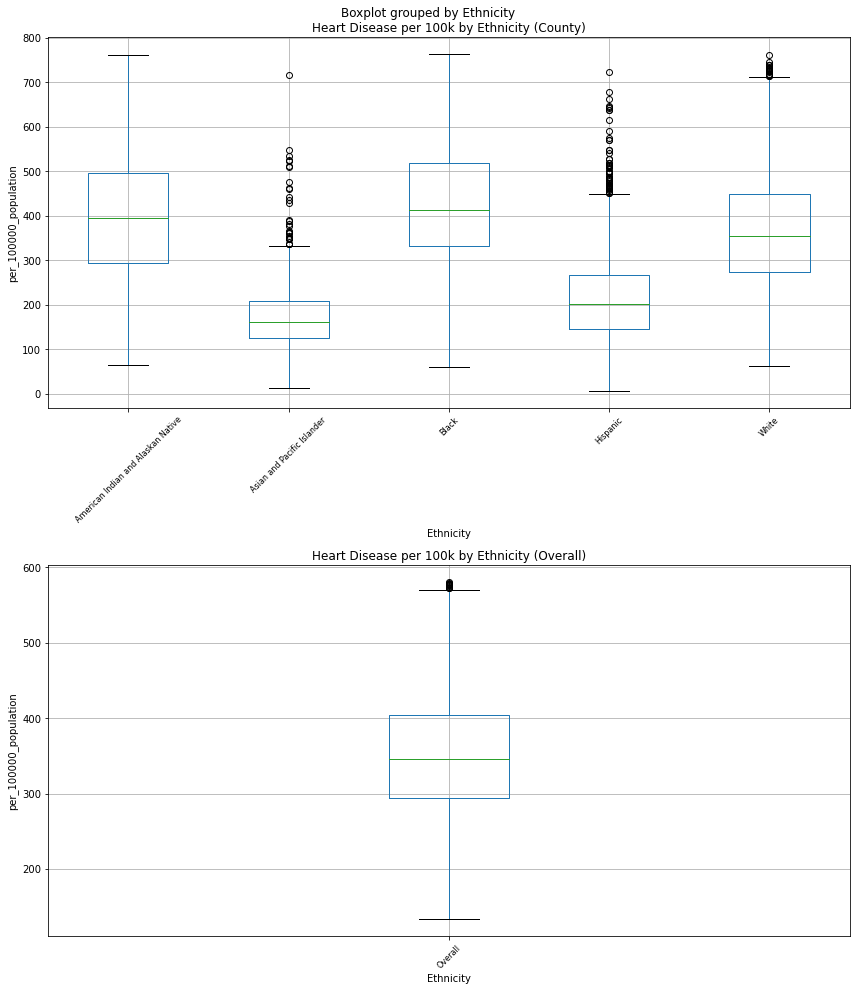

In [37]:
# Create a figure and axes for the first set of subplots
fig, axes1 = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))

# Subplot 1: Box plot for Heart Disease per 100k by Gender in cleaned_county_df
cleaned_county_df.boxplot(column='Heart Disease per 100k', by='Gender', ax=axes1[0])
axes1[0].set_title('Heart Disease per 100k by Gender (County)')
axes1[0].set_ylabel('per_100000_population')

# Subplot 2: Box plot for Heart Disease per 100k by Gender in cleaned_county_overall_df
cleaned_county_overall_df.boxplot(column='Heart Disease per 100k', by='Gender', ax=axes1[1])
axes1[1].set_title('Heart Disease per 100k by Gender (Overall)')
axes1[1].set_ylabel('per_100000_population')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Create a new figure and axes for the second set of subplots
fig, axes2 = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))

# Subplot 1: Box plot for Heart Disease per 100k by Ethnicity in cleaned_county_df
cleaned_county_df.boxplot(column='Heart Disease per 100k', by='Ethnicity', ax=axes2[0])
axes2[0].set_title('Heart Disease per 100k by Ethnicity (County)')
axes2[0].set_ylabel('per_100000_population')
axes2[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate and decrease x-axis tick label size

# Subplot 2: Box plot for Heart Disease per 100k by Ethnicity in cleaned_county_overall_df
cleaned_county_overall_df.boxplot(column='Heart Disease per 100k', by='Ethnicity', ax=axes2[1])
axes2[1].set_title('Heart Disease per 100k by Ethnicity (Overall)')
axes2[1].set_ylabel('per_100000_population')
axes2[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate and decrease x-axis tick label size

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [38]:
# Chi-square test for gender
contingency_gender = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['Gender'])
chi2_stat_gender, p_val_gender, _, _ = chi2_contingency(contingency_gender)

# Chi-square test for race
contingency_race = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['Ethnicity'])
chi2_stat_race, p_val_race, _, _ = chi2_contingency(contingency_race)

# Chi-square test for county
contingency_geo = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['County'])
chi2_stat_geo, p_val_geo, _, _ = chi2_contingency(contingency_geo)

# Chi-square test for state
contingency_state = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['State'])
chi2_stat_state, p_val_state, _, _ = chi2_contingency(contingency_state)

# Create a DataFrame for the chi-square statistics and p-values
data = {
    'Category': ['Gender', 'Ethnicity', 'County', 'State'],
    'Chi-square statistic': [chi2_stat_gender, chi2_stat_race, chi2_stat_geo, chi2_stat_state],
    'p-value': [p_val_gender, p_val_race, p_val_geo, p_val_state]
}

# Create the DataFrame for Chi-Square test
chi_square_df = pd.DataFrame(data)

# Print the DataFrame
print(chi_square_df)


    Category  Chi-square statistic        p-value
0     Gender          7.171499e+03   3.097805e-69
1  Ethnicity          2.560000e+04  2.355235e-111
2     County          9.512658e+06   1.000000e+00
3      State          2.557907e+05   9.999865e-01


In [39]:
# Calculate the overall mean heart disease rate
mean_heart_disease = cleaned_county_df['Heart Disease per 100k'].mean()

# Iterate through each state and perform the Z-test
for state in cleaned_county_df['State'].unique():
    heart_disease_state = cleaned_county_df[cleaned_county_df['State'] == state]['Heart Disease per 100k']
    
    # Performing the Z-test
    z_stat = (heart_disease_state.mean() - mean_heart_disease) / (heart_disease_state.std() / np.sqrt(len(heart_disease_state)))
    p_value = stats.norm.cdf(z_stat) * 2  # two-tailed test
    
    # Round Z-statistic and P-value to two decimals
    z_stat_rounded = round(z_stat, 2)
    p_value_rounded = round(p_value, 2)
    
    # Outputting the result
    print(f"Z-test for {state}:")
    print(f"Z-statistic: {z_stat_rounded}")
    print(f"P-value: {p_value_rounded}")
    if p_value < 0.05:
        print("The mean heart disease rate for this state is significantly different from the overall mean.")
    else:
        print("The mean heart disease rate for this state is not significantly different from the overall mean.")
    print()

# Z-test for Ethnicity
# Iterate through each ethnicity and perform the Z-test
for ethnicity in cleaned_county_df['Ethnicity'].unique():
    heart_disease_ethnicity = cleaned_county_df[cleaned_county_df['Ethnicity'] == ethnicity]['Heart Disease per 100k']
    
    # Performing the Z-test
    z_stat = (heart_disease_ethnicity.mean() - mean_heart_disease) / (heart_disease_ethnicity.std() / np.sqrt(len(heart_disease_ethnicity)))
    p_value = stats.norm.cdf(z_stat) * 2  # two-tailed test
    
    # Round Z-statistic and P-value to two decimals
    z_stat_rounded = round(z_stat, 2)
    p_value_rounded = round(p_value, 2)
    
    # Outputting the result
    print(f"Z-test for {ethnicity}:")
    print(f"Z-statistic: {z_stat_rounded}")
    print(f"P-value: {p_value_rounded}")
    if p_value < 0.05:
        print("The mean heart disease rate for this ethnicity is significantly different from the overall mean.")
    else:
        print("The mean heart disease rate for this ethnicity is not significantly different from the overall mean.")
    print()

# Z-test for Gender
# Iterate through each gender and perform the Z-test
for gender in cleaned_county_df['Gender'].unique():
    heart_disease_gender = cleaned_county_df[cleaned_county_df['Gender'] == gender]['Heart Disease per 100k']
    
    # Performing the Z-test
    z_stat = (heart_disease_gender.mean() - mean_heart_disease) / (heart_disease_gender.std() / np.sqrt(len(heart_disease_gender)))
    p_value = stats.norm.cdf(z_stat) * 2  # two-tailed test
    
    # Round Z-statistic and P-value to two decimals
    z_stat_rounded = round(z_stat, 2)
    p_value_rounded = round(p_value, 2)
    
    # Outputting the result
    print(f"Z-test for {gender}:")
    print(f"Z-statistic: {z_stat_rounded}")
    print(f"P-value: {p_value_rounded}")
    if p_value < 0.05:
        print("The mean heart disease rate for this gender is significantly different from the overall mean.")
    else:
        print("The mean heart disease rate for this gender is not significantly different from the overall mean.")
    print()


Z-test for AK:
Z-statistic: -1.62
P-value: 0.11
The mean heart disease rate for this state is not significantly different from the overall mean.

Z-test for AL:
Z-statistic: 11.87
P-value: 2.0
The mean heart disease rate for this state is not significantly different from the overall mean.

Z-test for AR:
Z-statistic: 12.6
P-value: 2.0
The mean heart disease rate for this state is not significantly different from the overall mean.

Z-test for AZ:
Z-statistic: -7.56
P-value: 0.0
The mean heart disease rate for this state is significantly different from the overall mean.

Z-test for CA:
Z-statistic: -9.3
P-value: 0.0
The mean heart disease rate for this state is significantly different from the overall mean.

Z-test for CO:
Z-statistic: -19.56
P-value: 0.0
The mean heart disease rate for this state is significantly different from the overall mean.

Z-test for CT:
Z-statistic: -7.8
P-value: 0.0
The mean heart disease rate for this state is significantly different from the overall mean.

Z-

<h1>Model Selection and Analysis</h1>

<h2>Linear Regression and Clustering</h2>

In [40]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [41]:
# Create a copy of cleaned_county_df for regression analysis
gender_regression_df = cleaned_county_df.copy()

# Convert 'Gender' to dummy variables
# Now 'Gender' will be encoded as 1 for Male and 0 for Female
gender_regression_df['Gender'] = pd.get_dummies(gender_regression_df['Gender'], drop_first=True)

# Define the independent variable (X) and dependent variable (Y)
x_gender = gender_regression_df['Gender']
y_heart = gender_regression_df['Heart Disease per 100k']

# Add a constant term to the independent variable
x_gender = sm.add_constant(x_gender)

# Fit the regression model
gender_regression_model = sm.OLS(y_heart, x_gender).fit()

# Print the summary of the regression model
print(gender_regression_model.summary())

# Notes for the presentation 
# R-Squared shows 23.6% of variability of the heart disease is explained by gender
# F statistic 4167 the model is significantly better fit than a model with no predictors 
# prob of F statistics is close to 0 which proves that gender is related to heart disease
# Log-likelihood is for model comparison. Higher is better
# AIC, BIC are for other model comparisons. The lower is better

# males = 1
# females 0 
# Const coef: this is to show when all values are 0 (Gender = 0 = female) which shows female average is 275.9 units
# Gender Coef: males have a higher disease mortality rate by 139.94 units
# t stat: shows gender is statistically significant
# P>|t|: shows the p-values are close to .00 so are significant
# omnibus: this is small so it is normally distributed
# prob(omnibus): higher values show it is normal 
# Durbin-Watson: Since it is not close to two this shows significant autocorrelation
# Cond. No. : This measures multicollinearity. Values greater than 30 indicate multicollinearity

# MODEL AND DATA IS SIGNIFICANT




                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.236
Model:                                OLS   Adj. R-squared:                  0.236
Method:                     Least Squares   F-statistic:                     4167.
Date:                    Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                            18:18:23   Log-Likelihood:                -84329.
No. Observations:                   13484   AIC:                         1.687e+05
Df Residuals:                       13482   BIC:                         1.687e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
# Create a copy of cleaned_county_df for regression analysis
ethnicity_regression_df = cleaned_county_df.copy()

# One-hot encode the 'Ethnicity' column
ethnicity_dummies = pd.get_dummies(ethnicity_regression_df['Ethnicity'])

# Concatenate the dummy variables with the original DataFrame
ethnicity_regression_dummies = pd.concat([ethnicity_regression_df, ethnicity_dummies], axis=1)

# Define the independent variables (X) and dependent variable (Y)
x_ethnicity = ethnicity_regression_dummies[['White', 'Black', 'Hispanic', 'American Indian and Alaskan Native', 'Asian and Pacific Islander']]
y_heart = ethnicity_regression_dummies['Heart Disease per 100k']

# Add a constant term to the independent variables
x_ethnicity = sm.add_constant(x_ethnicity)

# Fit the regression model
ethnicity_regression_model = sm.OLS(y_heart, x_ethnicity).fit()

# Print the summary of the regression model
print(ethnicity_regression_model.summary())

# R-Squared: 28% of the data is explained by ethnicity
# F statistic: 1329 shows the model is significant
# Prob of F statistics: is close to 0 which shows it's significant

# Log-likelihood: is for model comparison. Higher is better
# AIC, BIC: are for other model comparisons. The lower is better

# Const coef: the average when no one has ethnicity (the default is assumed white)
# Rest of Coef: average heart disease for each ethnicity
# t stat: larger absolute values indicate greater evidence against the null hypothesis
# P>|t|: no significance since close to 1

# MODEL is significant but the data is not


                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.340
Model:                                OLS   Adj. R-squared:                  0.340
Method:                     Least Squares   F-statistic:                     1737.
Date:                    Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                            18:18:23   Log-Likelihood:                -83342.
No. Observations:                   13484   AIC:                         1.667e+05
Df Residuals:                       13479   BIC:                         1.667e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
# Make a copy of the dummy data without the 'White' column to remove multicollinearity
ethnicity_regression_dummies_noCol = ethnicity_regression_dummies.drop(columns=['White'])

# Define the predictor variables after removing 'White' to address multicollinearity
x_no_white = ethnicity_regression_dummies_noCol[['Black', 'Hispanic', 'American Indian and Alaskan Native', 'Asian and Pacific Islander']]

# Define the target variable
y_heart = ethnicity_regression_dummies['Heart Disease per 100k']

# Calculate Variance Inflation Factor (VIF) to detect multicollinearity
vif_data = sm.add_constant(x_no_white)
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Identify variables with VIF greater than 10 (common threshold indicating multicollinearity)
high_vif_variables = vif[vif["VIF"] > 10]["Variable"].tolist()

# Drop high VIF variables from the predictor variables
x_no_white = x_no_white.drop(columns=high_vif_variables)
x_no_white = sm.add_constant(x_no_white)

# Fit Ordinary Least Squares (OLS) regression model using the updated predictor variables
# and the target variable y_heart
model = sm.OLS(y_heart, x_no_white).fit()

# Print the summary of the regression model
print("\nModel Summary After Addressing Multicollinearity:")
print(model.summary())

# R-Squared: 31% of the data is explained by ethnicity
# F statistic: 1529 shows the model is significant
# Prob of F statistics: is close to 0 which shows it's significant

# Log-likelihood (negative does not matter): is for model comparison. Higher is better
# AIC, BIC: are for other model comparisons. The lower is better

# Const coef: the average when no one has ethnicity (the default is assumed white)
# black coef: higher than white
# hispanic coef: lower than white
# indian coef: higher than white
# asian coef: worse than white
# t stat: larger absolute values indicate greater evidence against the null hypothesis
# P>|t|: significance since close to .00

# MODEL AND DATA IS SIGNIFICANT






Model Summary After Addressing Multicollinearity:
                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.340
Model:                                OLS   Adj. R-squared:                  0.340
Method:                     Least Squares   F-statistic:                     1737.
Date:                    Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                            18:18:23   Log-Likelihood:                -83342.
No. Observations:                   13484   AIC:                         1.667e+05
Df Residuals:                       13479   BIC:                         1.667e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [44]:
# Make a copy of the original dataframe
state_regression_df = cleaned_county_df.copy()

# Create hot encoded data, dropping the first state (AK)
state_regression_encode = pd.get_dummies(state_regression_df, columns=['State'], drop_first=True)

# Define predictor variables (hot encoded states) and target variable (heart disease rate)
x_hot_encoded_state = state_regression_encode.drop(['Heart Disease per 100k', 'County', 'Gender', 'Ethnicity'], axis=1)
y_heart = state_regression_encode['Heart Disease per 100k']

# Calculate Variance Inflation Factor (VIF) to detect multicollinearity
vif_data_state = sm.add_constant(x_hot_encoded_state)
vif_state = pd.DataFrame()
vif_state["Variable"] = vif_data_state.columns
vif_state["VIF"] = [variance_inflation_factor(vif_data_state.values, i) for i in range(vif_data_state.shape[1])]

# Identify variables with VIF greater than 10 (common threshold indicating multicollinearity)
high_vif_variables = vif_state[vif_state["VIF"] > 10]["Variable"].tolist()

# Remove constant from high VIF variables list
high_vif_variables.remove('const')

# Drop variables with high VIF
x_hot_encoded_state = x_hot_encoded_state.drop(high_vif_variables, axis=1)

# Add constant
x_hot_encoded_state = sm.add_constant(x_hot_encoded_state)

# Fit Ordinary Least Squares (OLS) regression model using the updated predictor variables and the target variable y_heart
model = sm.OLS(y_heart, x_hot_encoded_state).fit()

# Print the summary of the regression model
print("\nModel Summary After Addressing Multicollinearity:")
print(model.summary())


# R-Squared: 16% of the data is explained by the ethnicity
# F statistic: 54 shows the model is significant
# Prob of F statistics: is close to 0 which shows it's significant

# Log-likelihood (negative does not matter): is for model comparison. Higher is better
# AIC, BIC: are for other model comparisons. The lower is better

# Const coef: the average when no one has the state (the default is assumed Alaska)
# t stat: larger absolute values indicate greater evidence against the null hypothesis
# P>|t|: Depends on the state, some of them are not significant. These would be the states to study

# MODEL AND DATA ARE SIGNIFICANT (depending on state)

# Based on the chi-square test, these results for significant contribution to heart disease mortality 
# can be due to random chance. It is best to examine the counties that do not have significance if you want to 
# deep dive more and go under the assumption that this is not due to random chance.

# Texas and Georgia were removed due to high VIF.




c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)



Model Summary After Addressing Multicollinearity:
                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.165
Model:                                OLS   Adj. R-squared:                  0.162
Method:                     Least Squares   F-statistic:                     55.22
Date:                    Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                            18:18:24   Log-Likelihood:                -84931.
No. Observations:                   13484   AIC:                         1.700e+05
Df Residuals:                       13435   BIC:                         1.703e+05
Df Model:                              48                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [45]:
# Define states of interest
states_of_interest = ['AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'IA', 'ID', 'LA', 'MA', 
                      'MD', 'ME', 'MN', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 
                      'NY', 'OR', 'PA', 'RI', 'UT', 'VA', 'VT', 'WA', 'WI']

# Initialize dictionaries to store coefficients and p-values
coefficients = {}
p_values = {}

# Extract coefficients and p-values from Table 1
table_data = model.summary().tables[1].data
for row in table_data[2:]:  # Skip the first two rows as they contain headers
    state = row[0].split('_')[1]  # Extract state abbreviation
    if state in states_of_interest:
        coef = float(row[1])  # Extract coefficient value
        p_val = float(row[4])  # Extract p-value
        coefficients[state] = coef
        p_values[state] = p_val

# Print coefficients and p-values for the specified states
for state in states_of_interest:
    print(f"State: {state}, Coefficient: {coefficients[state]}, P-value: {p_values[state]}")

# Comments:
# The code extracts coefficients and p-values from Table 1 of the regression model summary and prints them for the specified states.
# The specified states of interest are those in the list 'states_of_interest'.
# Coefficients are stored in the 'coefficients' dictionary, and p-values are stored in the 'p_values' dictionary.
# The code ensures that only coefficients and p-values for the specified states are extracted and printed.
# The loop iterates through the table data, skipping the first two rows (which contain headers), and splits the state abbreviation from the table row.
# It then checks if the state is in the list of states of interest and extracts the coefficient and p-value accordingly.





State: AZ, Coefficient: -90.5651, P-value: 0.0
State: CA, Coefficient: -66.5237, P-value: 0.0
State: CO, Coefficient: -116.3073, P-value: 0.0
State: CT, Coefficient: -115.339, P-value: 0.0
State: DE, Coefficient: -102.2251, P-value: 0.0
State: FL, Coefficient: -82.7003, P-value: 0.0
State: IA, Coefficient: -22.6363, P-value: 0.009
State: ID, Coefficient: -85.7739, P-value: 0.0
State: LA, Coefficient: 76.7923, P-value: 0.0
State: MA, Coefficient: -136.2924, P-value: 0.0
State: MD, Coefficient: -70.5372, P-value: 0.0
State: ME, Coefficient: -50.2948, P-value: 0.03
State: MN, Coefficient: -107.0522, P-value: 0.0
State: NC, Coefficient: -44.9266, P-value: 0.0
State: ND, Coefficient: -42.9216, P-value: 0.001
State: NE, Coefficient: -62.2146, P-value: 0.0
State: NH, Coefficient: -124.1877, P-value: 0.0
State: NJ, Coefficient: -85.2237, P-value: 0.0
State: NM, Coefficient: -67.7342, P-value: 0.0
State: NV, Coefficient: -29.6679, P-value: 0.017
State: NY, Coefficient: -42.7607, P-value: 0.0
St

In [46]:
# Drop the constant column from x_no_white as it's not needed in this context
default_white_race = x_no_white.drop(columns='const')

# Combine gender and race with heart disease data
combined = pd.concat([gender_regression_df[['Gender', 'Heart Disease per 100k']], default_white_race], axis=1)

# Separate predictors (x_comb) and target (y_comb)
x_comb = combined.drop('Heart Disease per 100k', axis=1)
y_comb = combined['Heart Disease per 100k']

# Add constant for the intercept term
x_comb = sm.add_constant(x_comb)

# Fit Ordinary Least Squares (OLS) regression model
model = sm.OLS(y_comb, x_comb).fit()

# Print model summary
print(model.summary())


# R-Squared: 58% of the data is explained by ethnicity
# F statistic: 3816 show model is significant
# prob of F statistics: is close to 0 which shows it significant

# Log-likelohood(neg does not matter): is for model comparison. Higher is better
# AIC, BIC: are for other model comparisons. the lower is better

# Const coef: the average when someone is a white female (all other refs are 0)
# Gender coef: being male increases 142 units
# black coef: being black incerease by 60
# hispanic coef: lowers by 155
# indian coef: higher by 28
# asian coef: being asian lowers by 196
# t stat: larger absolutes values indicate greater evidence against the null hypothesis
# P>|t|: significance since close to .00

# MODEL AND DATA IS SIGNIFICANT




                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.586
Model:                                OLS   Adj. R-squared:                  0.586
Method:                     Least Squares   F-statistic:                     3816.
Date:                    Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                            18:18:24   Log-Likelihood:                -80198.
No. Observations:                   13484   AIC:                         1.604e+05
Df Residuals:                       13478   BIC:                         1.605e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


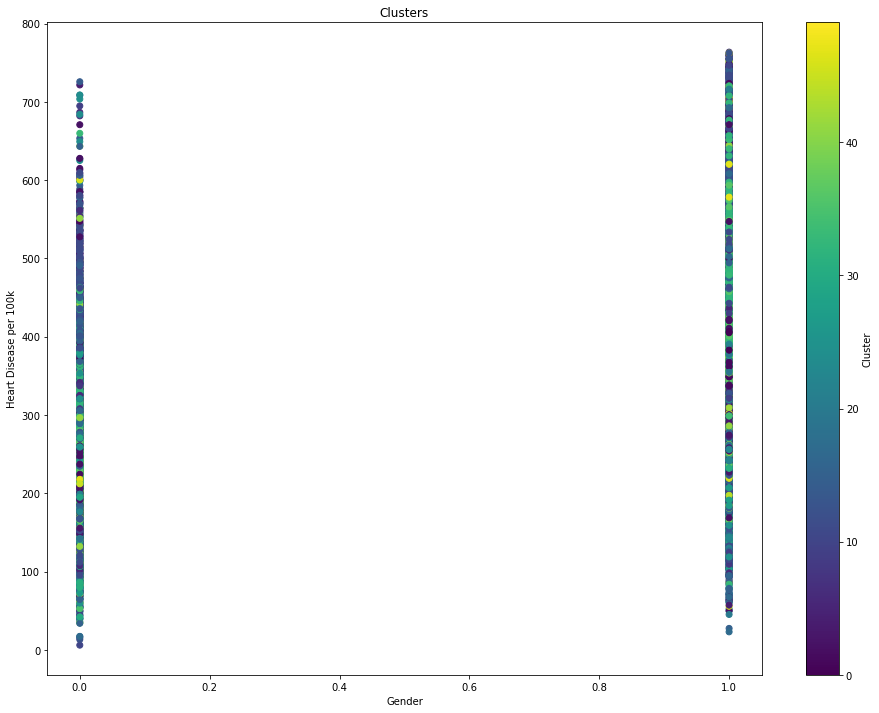

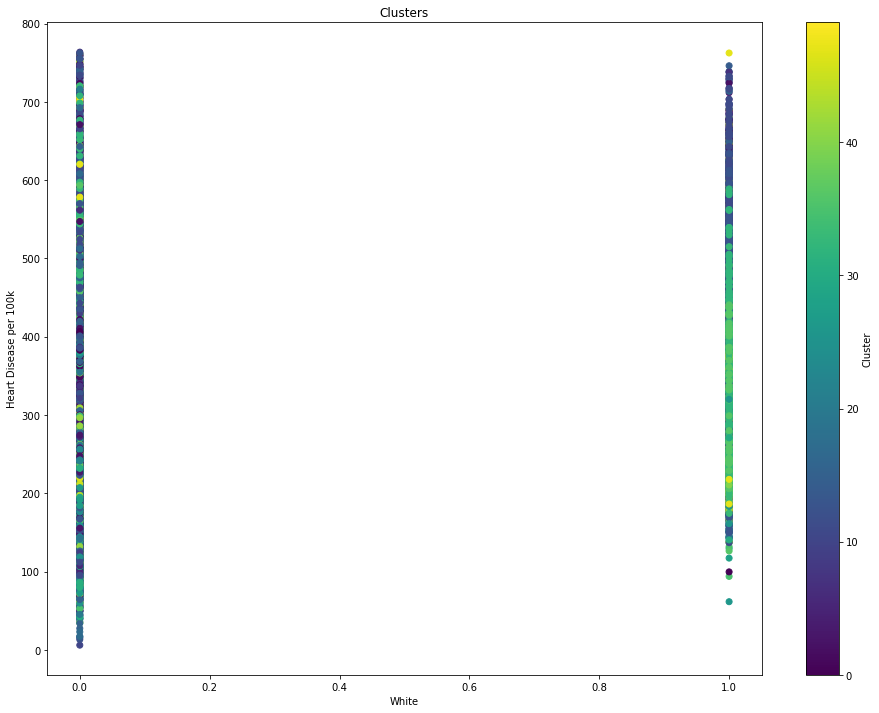

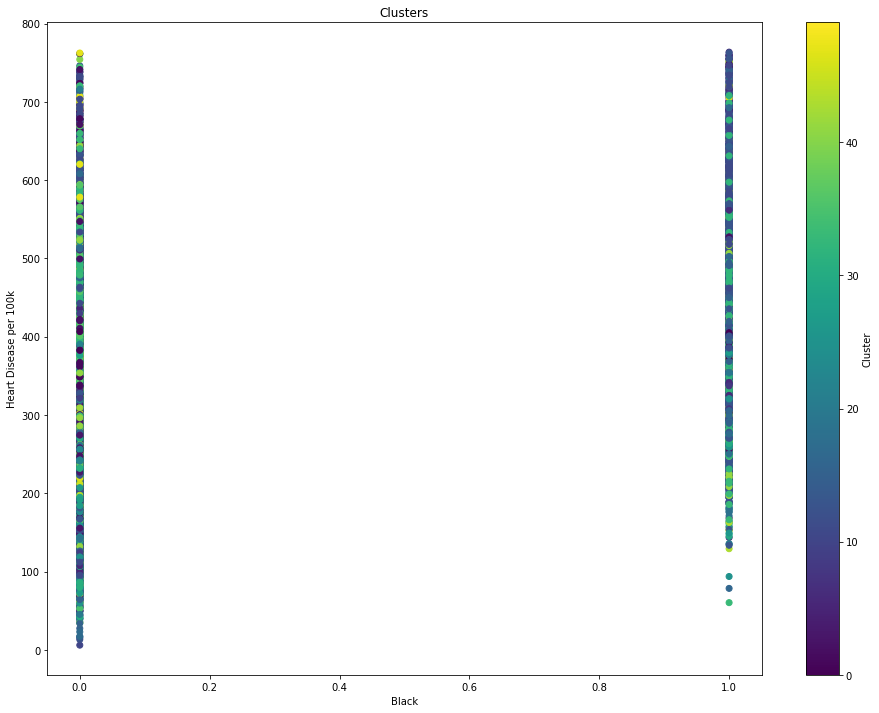

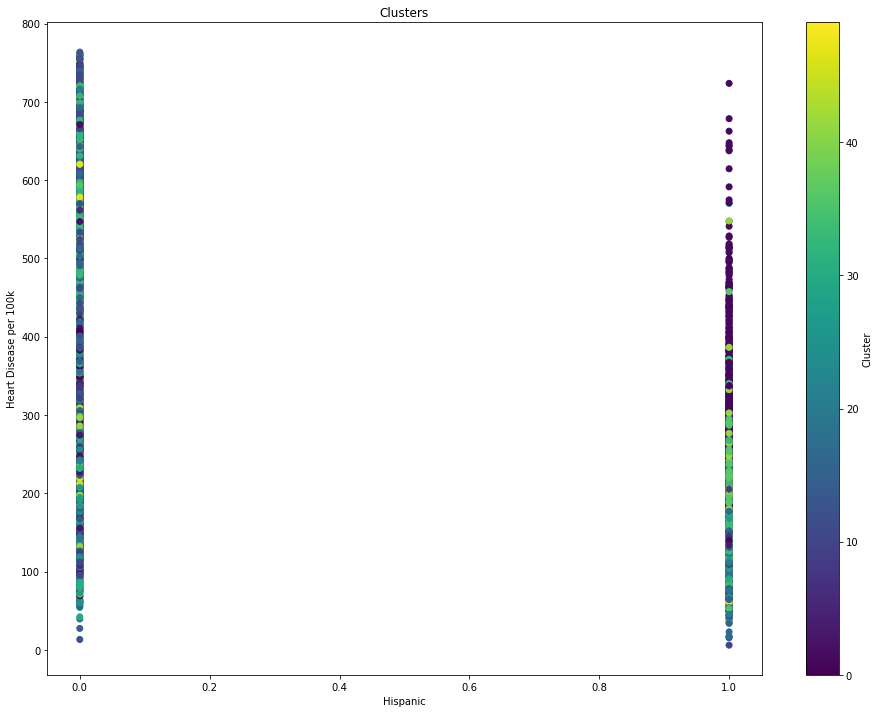

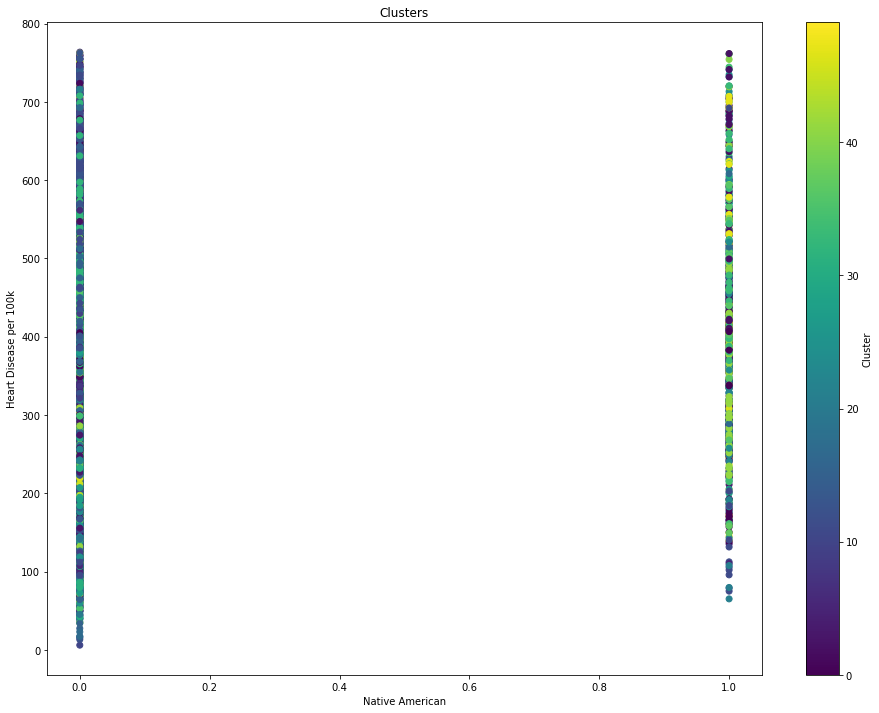

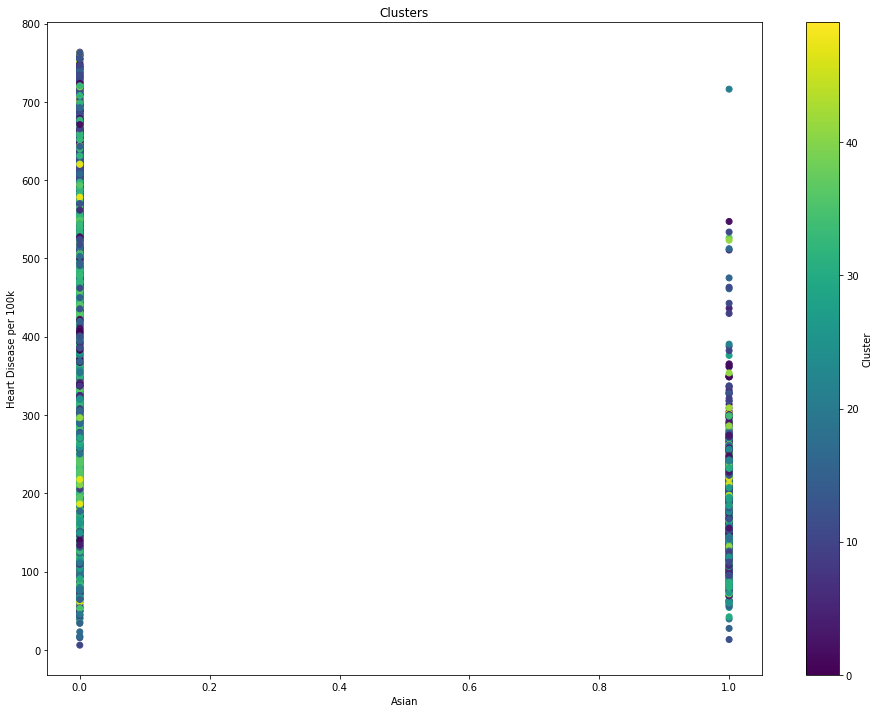

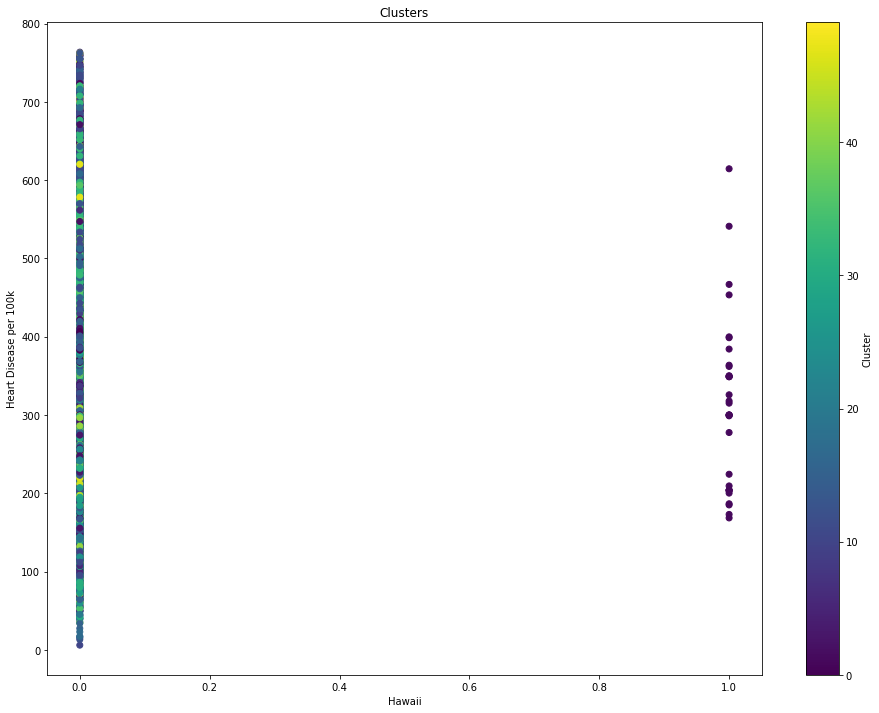

In [47]:
# Extracting necessary data
all_races = ethnicity_regression_dummies.copy()
all_races_only = all_races[['Black', 'Hispanic', 'American Indian and Alaskan Native', 'Asian and Pacific Islander', 'White']]

gender_bi = gender_regression_df.copy()
gender_bi = gender_bi[['Gender', 'Heart Disease per 100k']]

all_state = pd.get_dummies(state_regression_df, columns=['State'])
all_state_only = all_state.drop(['Heart Disease per 100k', 'County', 'Gender', 'Ethnicity'], axis=1)

# Combine all data for clustering
combined_cluster_no_state = combined.copy()
default_state = x_hot_encoded_state.drop(columns='const')
combined_cluster = pd.concat([all_races_only, gender_bi, all_state_only], axis=1)

# Standardize the features
scaler = StandardScaler()
combined_cluster_scaled = scaler.fit_transform(combined_cluster)

# Choose the number of clusters
num_clusters = 50  

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(combined_cluster_scaled)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
combined_cluster['Cluster'] = cluster_labels

# Get centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame to display centroid values
centroid_df = pd.DataFrame(centroids, columns=combined_cluster.columns[:-1])  # Exclude the 'Cluster' column

# Display centroid values
#print("Centroid Values for Each Cluster:")
#print(centroid_df)

# Scatter plot for Gender
plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['Gender'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Gender')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()

# Scatter plot for White race
plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['White'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('White')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()

# Scatter plot for Black race
plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['Black'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Black')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()

# Scatter plot for Hispanic race
plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['Hispanic'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Hispanic')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()

# Scatter plot for American Indian and Alaskan Native race
plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['American Indian and Alaskan Native'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Native American')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()

# Scatter plot for Asian and Pacific Islander race
plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['Asian and Pacific Islander'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Asian')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()

# Scatter plot for State (Hawaii)
plt.figure(figsize=(16, 12))
plt.scatter(combined_cluster['State_HI'], combined_cluster['Heart Disease per 100k'], c=cluster_labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Hawaii')
plt.ylabel('Heart Disease per 100k')
plt.colorbar(label='Cluster')
plt.show()


<h2>Linear Regression Visual Modeling </h2>

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

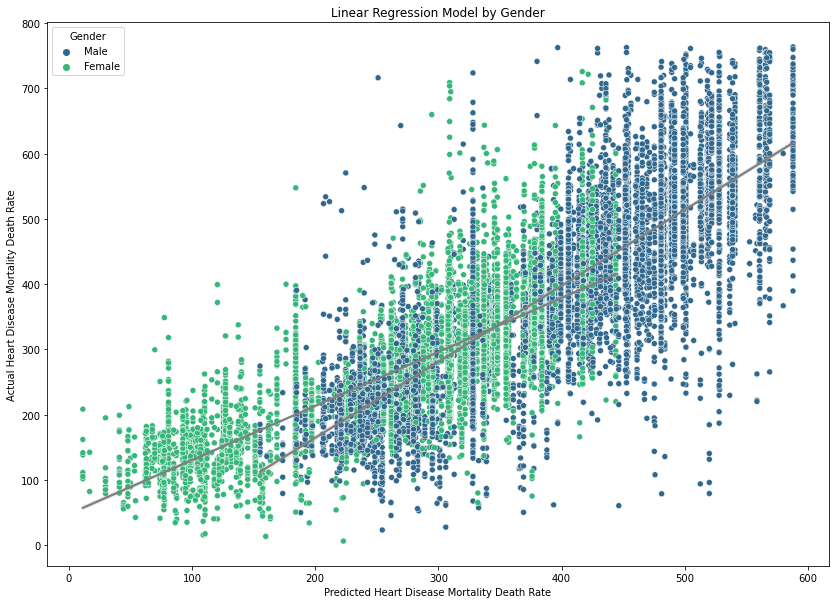

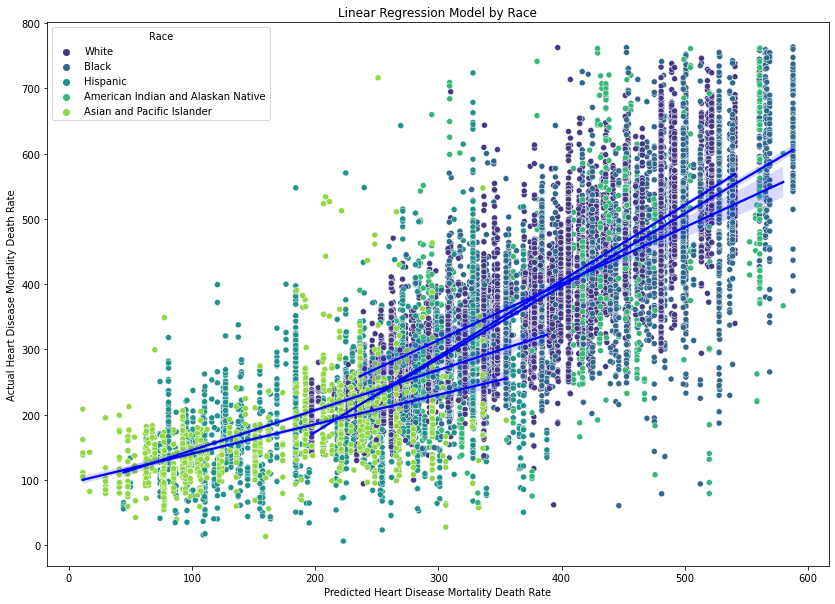

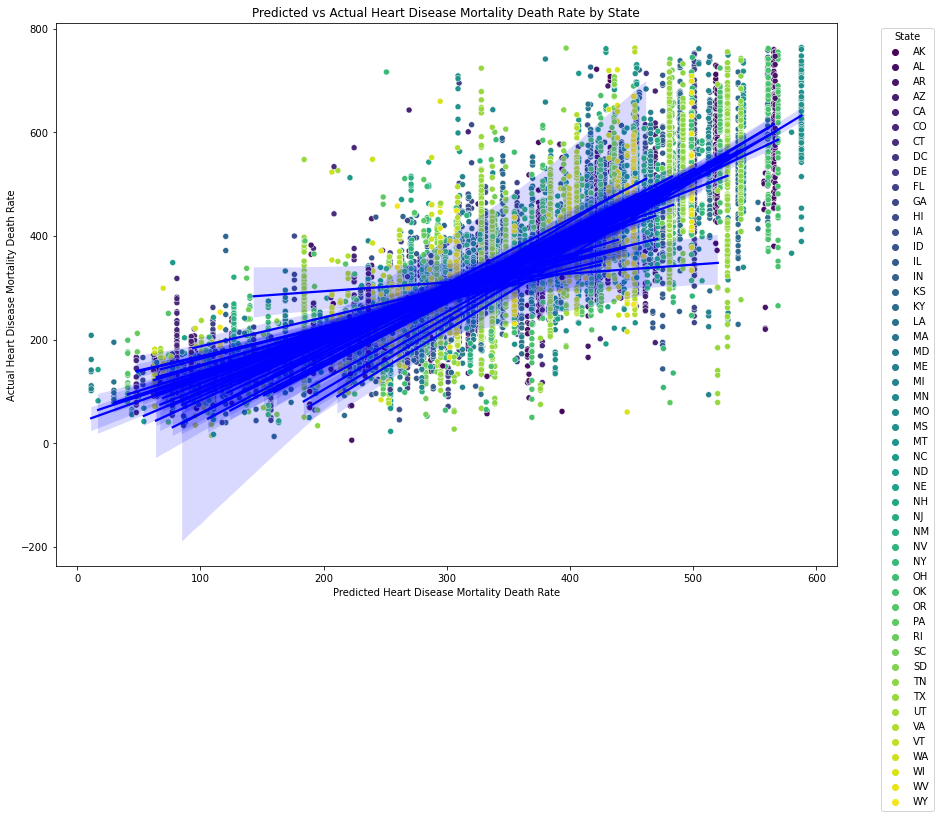

In [49]:
# Selecting relevant columns
X = cleaned_county_df[['Gender', 'Ethnicity', 'State']]
y = cleaned_county_df['Heart Disease per 100k']

# Define preprocessing steps for encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Gender', 'Ethnicity', 'State'])  # One-hot encode categorical variables
    ],
    remainder='passthrough'  # Pass through any remaining columns
)

# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Linear regression model
])

# Fit the pipeline on the data
pipeline.fit(X, y)

# Predict heart disease mortality death rate
y_pred = pipeline.predict(X)


# Plot for Gender
plt.figure(figsize=(14, 10))
sns.scatterplot(data=cleaned_county_df, x=y_pred, y=y, hue='Gender', palette='viridis', legend='full')
for category in cleaned_county_df['Gender'].unique():
    category_mask = (cleaned_county_df['Gender'] == category)
    sns.regplot(x=y_pred[category_mask], y=y[category_mask], scatter=False, color='gray')
plt.xlabel('Predicted Heart Disease Mortality Death Rate')
plt.ylabel('Actual Heart Disease Mortality Death Rate')
plt.title('Linear Regression Model by Gender')
plt.legend(title='Gender')
plt.show()

# Plot for Race
plt.figure(figsize=(14, 10))
sns.scatterplot(data=cleaned_county_df, x=y_pred, y=y, hue='Ethnicity', palette='viridis', legend='full')
for category in cleaned_county_df['Ethnicity'].unique():
    category_mask = (cleaned_county_df['Ethnicity'] == category)
    sns.regplot(x=y_pred[category_mask], y=y[category_mask], scatter=False, color='blue')
plt.xlabel('Predicted Heart Disease Mortality Death Rate')
plt.ylabel('Actual Heart Disease Mortality Death Rate')
plt.title('Linear Regression Model by Race')
plt.legend(title='Race')
plt.show()

# Plot for State
plt.figure(figsize=(14, 10))
sns.scatterplot(data=cleaned_county_df, x=y_pred, y=y, hue='State', palette='viridis')
for category in cleaned_county_df['State'].unique():
    category_mask = (cleaned_county_df['State'] == category)
    sns.regplot(x=y_pred[category_mask], y=y[category_mask], scatter=False, color='blue')
plt.xlabel('Predicted Heart Disease Mortality Death Rate')
plt.ylabel('Actual Heart Disease Mortality Death Rate')
plt.title('Predicted vs Actual Heart Disease Mortality Death Rate by State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


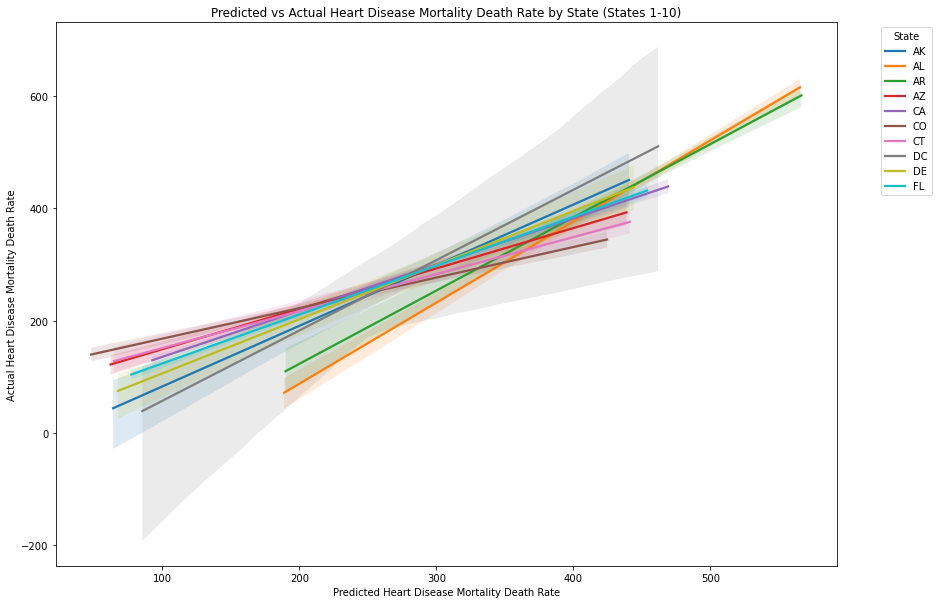

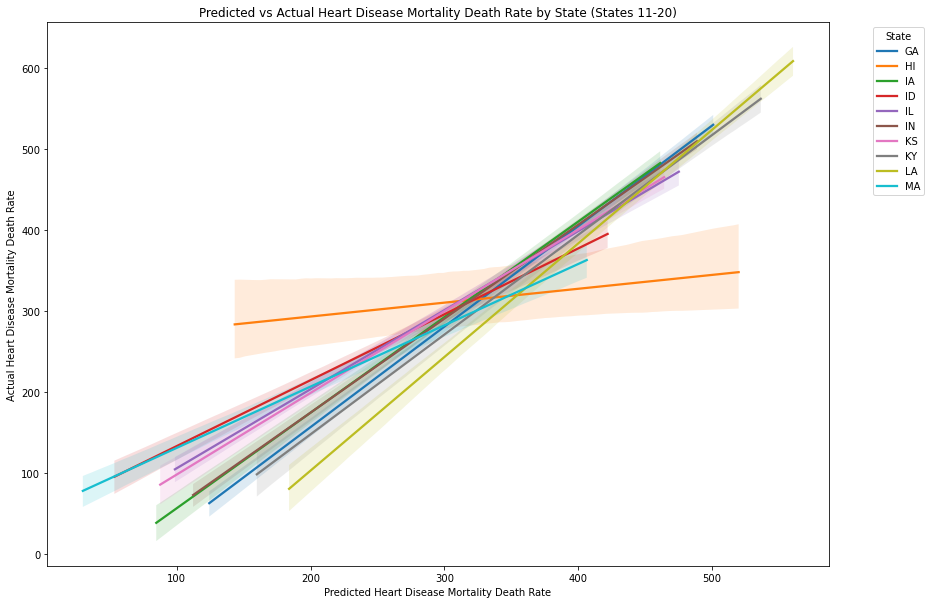

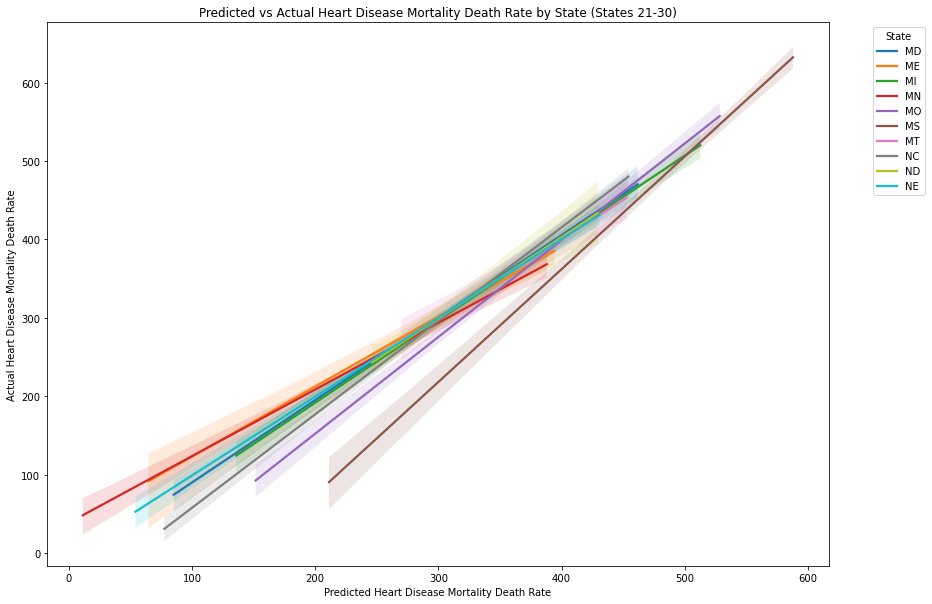

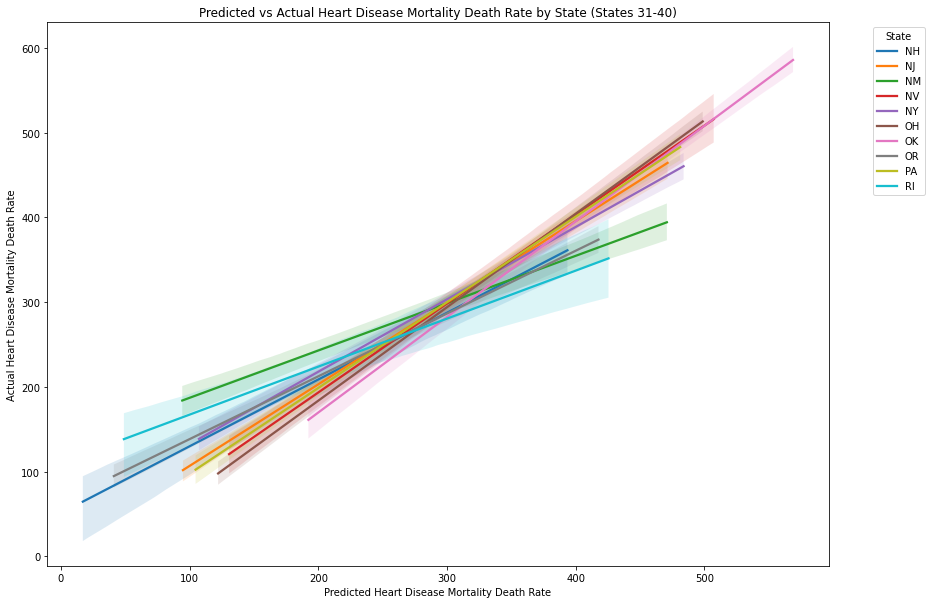

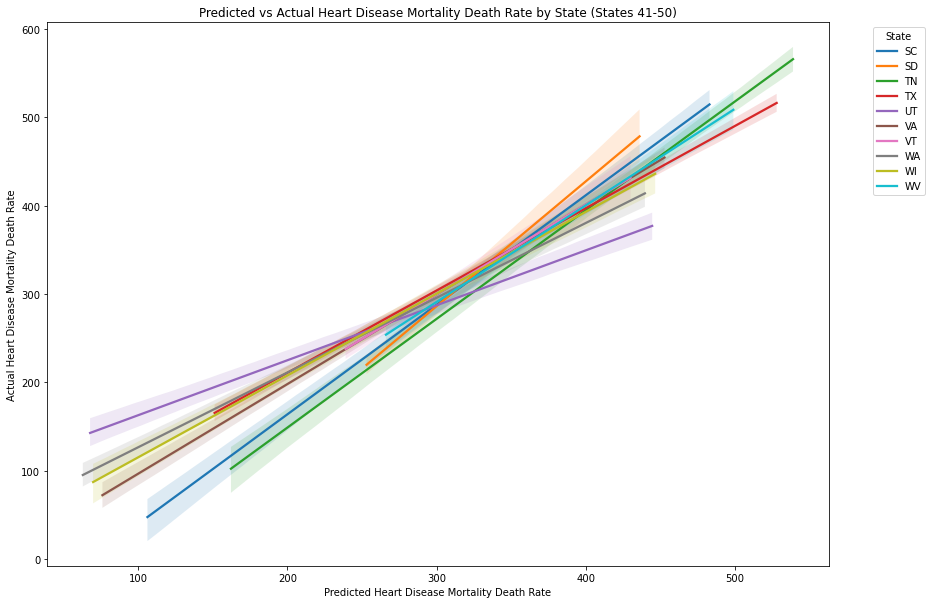

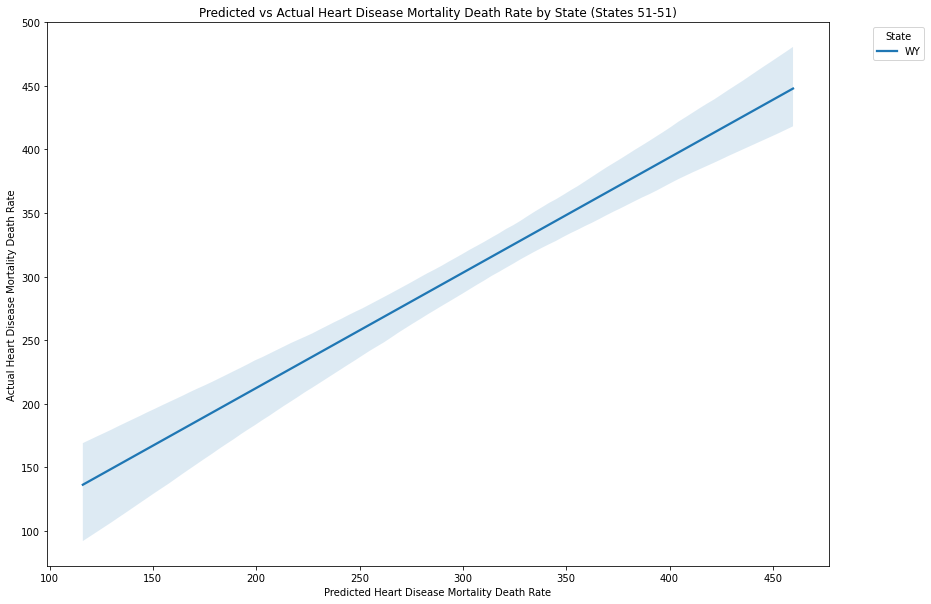

In [50]:
# Determine the number of groups (graphs) needed
num_states = len(cleaned_county_df['State'].unique())
num_groups = int(np.ceil(num_states / 10))  # Round up to the nearest integer

# Plot for each group of states
for i in range(num_groups):
    start_index = i * 10
    end_index = min((i + 1) * 10, num_states)  # Ensure not to exceed the number of states
    states_subset = list(cleaned_county_df['State'].unique())[start_index:end_index]
    
    plt.figure(figsize=(14, 10))
    for category in states_subset:
        category_mask = (cleaned_county_df['State'] == category)
        sns.regplot(x=y_pred[category_mask], y=y[category_mask], scatter=False, label=category)
    
    plt.xlabel('Predicted Heart Disease Mortality Death Rate')
    plt.ylabel('Actual Heart Disease Mortality Death Rate')
    plt.title(f'Predicted vs Actual Heart Disease Mortality Death Rate by State (States {start_index+1}-{end_index})')
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Assumption for Hawaii. It is the amount of data collected (seen in clustering) and 
    # assuming the population is majority Asian
